<a href="https://colab.research.google.com/github/SubhamZap/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>


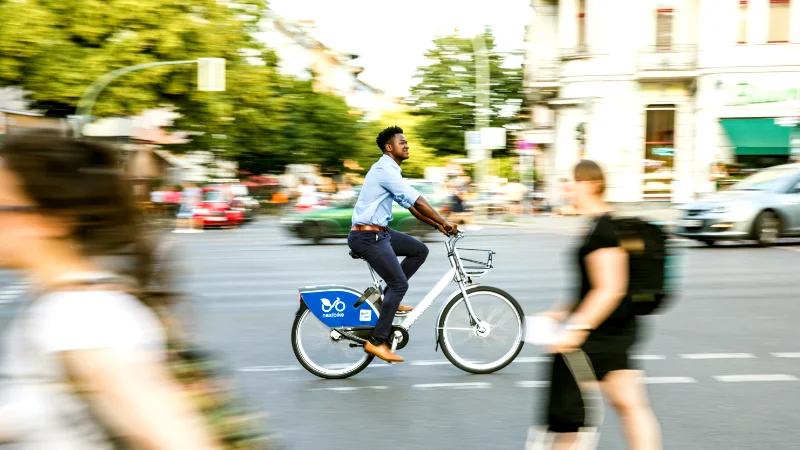

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Objective of the project

The objective is to predict the hourly number of bikes rented for the stable supply of rented bikes. The rental bike programs are gaining much traction espicially in urban cities, mostly due to environmental issues, traffic and pricing. These programs is also can be associated with fitness awareness program and with more competitive pricing and advertisement more people would shift from cabs to bikes.

# Hypothesis Generation

Before exploring the data and trying to understand the relationship between its variable, it is important to generate a hypothesis regarding the project. It might sound counter-intuitive but it helps in understanding the business problem more clearly, gaining the domain knowledge and avoid any kind of biases after getting into the project.

Here are some of the hypothesis which might affect the demand of bikes:

1. Hourly: The demand for bikes should be more during the office or school timings, i.e. between (7am - 10am) in the morning and (15pm - 19pm) in the evening.

2. Daily: Weekdays should generate more demand than weekends.

3. Seasonal: During rainfall or snowfall, the demand might be low as compared to during summer or fall.


# Table of Contents

1. Data Overview
2. EDA and Data pre-processing
3. Building Regressor models
4. Evaluating Regressor models

In [432]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Overview

In [434]:
# Loading the dataset

bike_df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction - Subham Choudhary/SeoulBikeData.csv', encoding = 'unicode escape')
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [435]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [436]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [437]:
# Understanding its numerical features

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Since, standard deviation isn't far from the mean, we can conclude that the dataset has no outlier.

# Exploratory Data Analysis

## Data Cleaning

In [438]:
# Checking for null values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [439]:
# Copy dataframe so that original dataframe doesn't change

bike_copy_df = bike_df.copy()

In [440]:
# Renaming some columns for easy usage

bike_copy_df.rename(columns = {'Rented Bike Count':'cnt', 'Temperature(°C)':'temp', 'Humidity(%)':'hum', 'Wind speed (m/s)':'windspeed', 
                               'Visibility (10m)':'vis', 'Dew point temperature(°C)':'dptemp', 'Solar Radiation (MJ/m2)':'rad', 'Rainfall(mm)':'rain', 
                               'Snowfall (cm)':'snow'}, inplace = True)

In [441]:
# Drop duplicate rows, if any

bike_copy_df.drop_duplicates(inplace= True)

In [442]:
# Convert all columns to lowercase

bike_copy_df.columns = [x.lower() for x in bike_copy_df.columns]

In [443]:
# Convert datatype of date

bike_copy_df['date'] = pd.to_datetime(bike_copy_df['date'])

# Convert the datatype either to float or to category

int_col = ['hour', 'seasons', 'holiday', 'functioning day']
for col in int_col:
  bike_copy_df[col] = bike_copy_df[col].astype('category')

In [444]:
# New dataframe

bike_copy_df.head()

,date,cnt,hour,temp,hum,windspeed,vis,dptemp,rad,rain,snow,seasons,holiday,functioning day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [445]:
# Info of new dataframe

bike_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8760 non-null   datetime64[ns]
 1   cnt              8760 non-null   int64         
 2   hour             8760 non-null   category      
 3   temp             8760 non-null   float64       
 4   hum              8760 non-null   int64         
 5   windspeed        8760 non-null   float64       
 6   vis              8760 non-null   int64         
 7   dptemp           8760 non-null   float64       
 8   rad              8760 non-null   float64       
 9   rain             8760 non-null   float64       
 10  snow             8760 non-null   float64       
 11  seasons          8760 non-null   category      
 12  holiday          8760 non-null   category      
 13  functioning day  8760 non-null   category      
dtypes: category(4), datetime64[ns](1), float

## Data Visualization

Text(0, 0.5, 'Rented Bike Count')

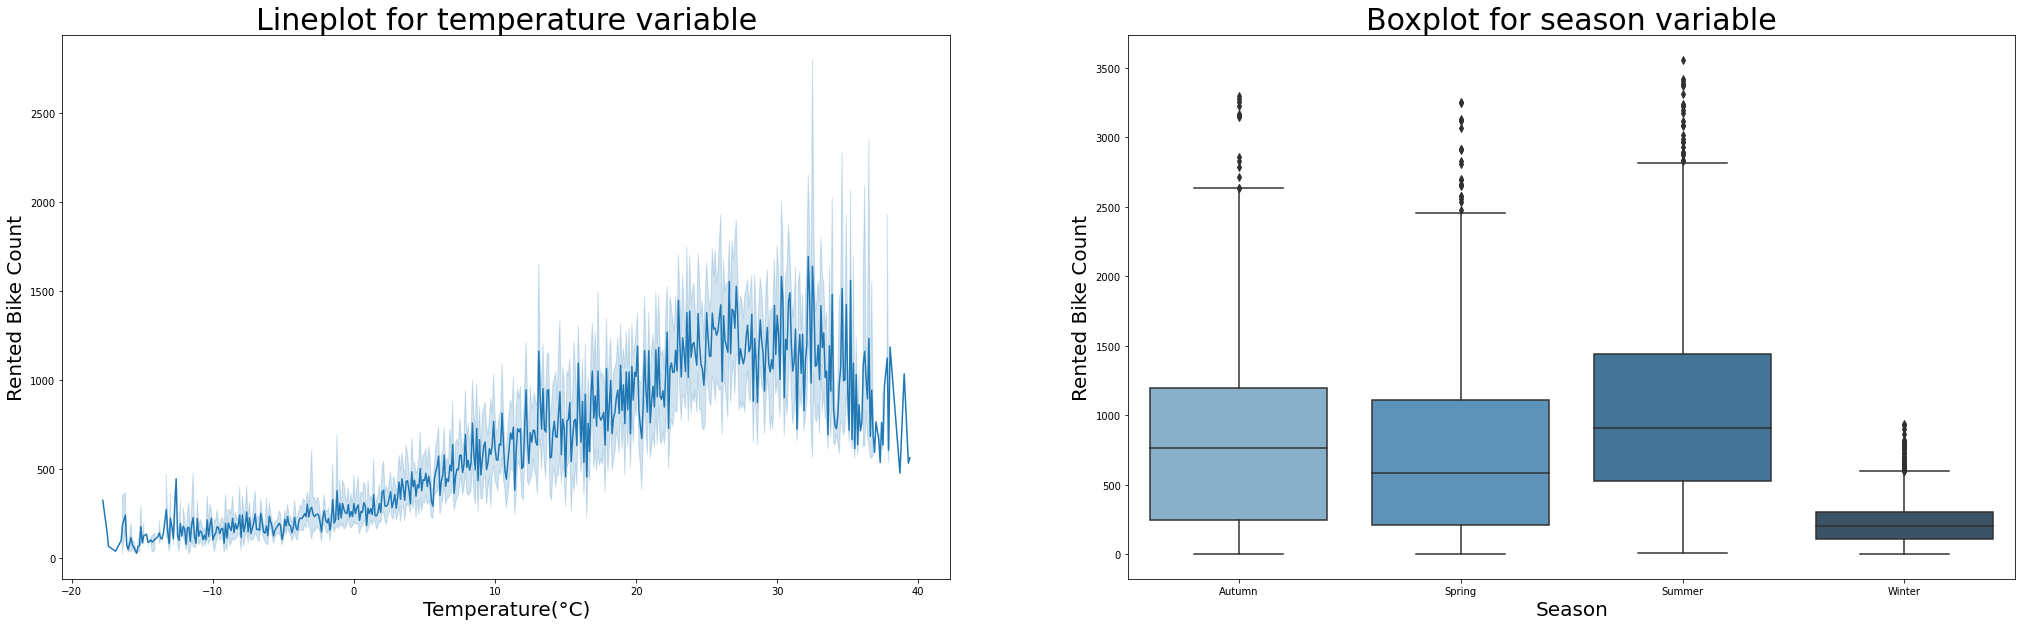

In [446]:
# Number of passangers by temperature and season

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(35, 10))

sns.lineplot(x='temp', y='cnt', data=bike_copy_df, ax=ax1, palette='Blues_d')
ax1.set_title('Lineplot for temperature variable',fontsize = 30)
ax1.set_xlabel('Temperature(°C)' , fontsize = 20)
ax1.set_ylabel('Rented Bike Count' , fontsize = 20)

sns.boxplot(x='seasons', y='cnt', data=bike_copy_df, ax=ax2, palette='Blues_d')
ax2.set_title('Boxplot for season variable',fontsize = 30)
ax2.set_xlabel('Season' , fontsize = 20)
ax2.set_ylabel('Rented Bike Count' , fontsize = 20)

Both the plot clearly illustrates that during winter season(when temperature is low) the number of rented bike is very few, but as the temperature increases, the number of rented bikes increases. 

Text(0, 0.5, 'Rented Bike Count')

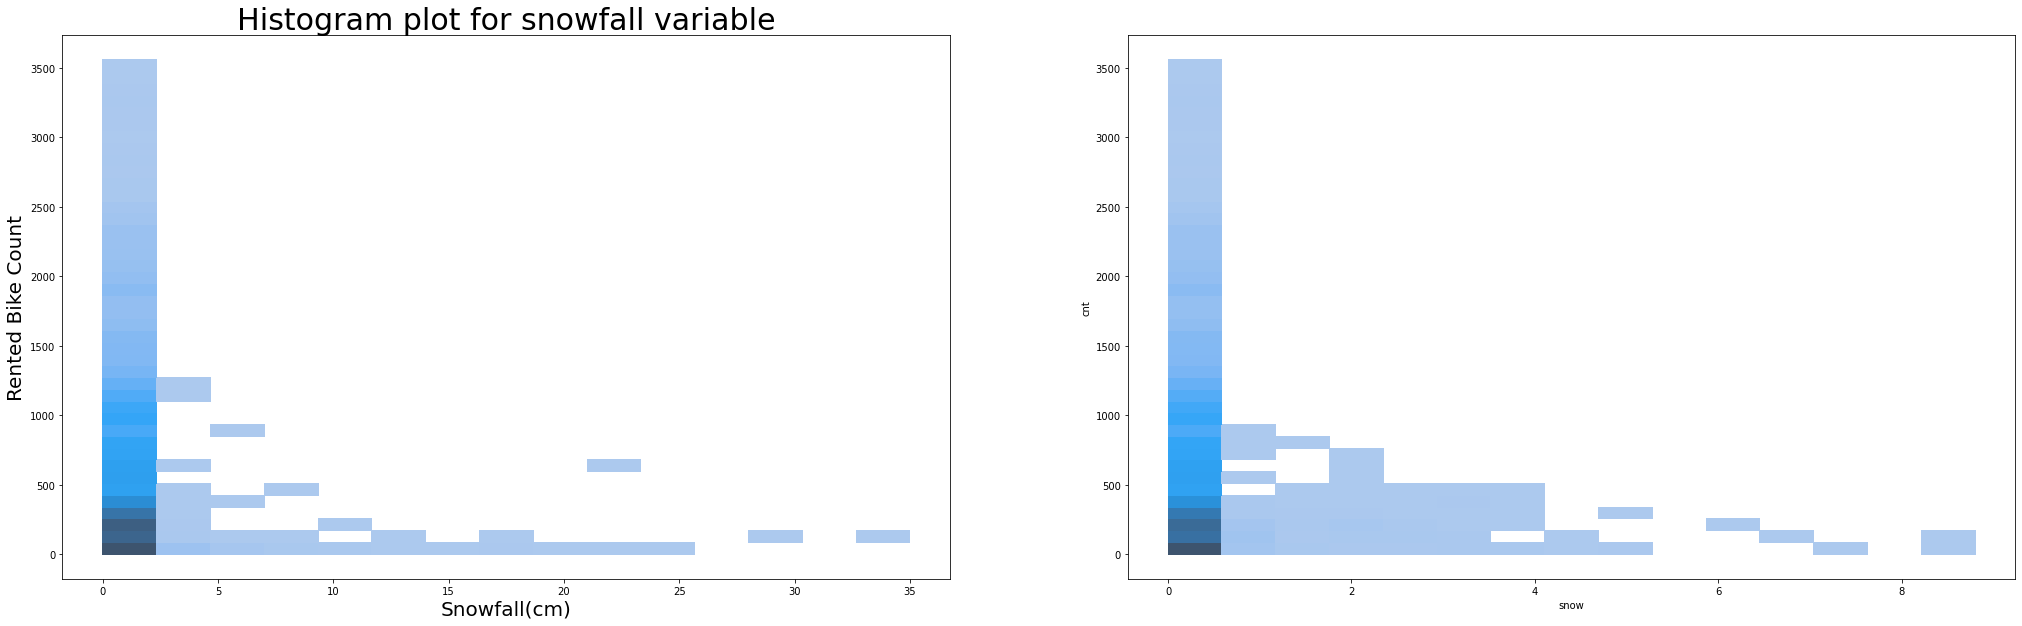

In [447]:
# Number of passangers by rain and snow

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(35, 10))

sns.histplot(x= 'rain', y='cnt', data= bike_copy_df, ax = ax1)
ax1.set_title('Histogram plot for rainfall variable',fontsize = 30)
ax1.set_xlabel('Rainfall(mm)' , fontsize = 20)
ax1.set_ylabel('Rented Bike Count' , fontsize = 20)

sns.histplot(x= 'snow', y='cnt', data= bike_copy_df, ax = ax2)
ax1.set_title('Histogram plot for snowfall variable',fontsize = 30)
ax1.set_xlabel('Snowfall(cm)' , fontsize = 20)
ax1.set_ylabel('Rented Bike Count' , fontsize = 20)

The above plot shows that when the rainfall and snowfall is minimum, the number of rented bikes is maximum, but as the amount of rainfall and snowfall increases, the number of rented bikes decreases. So, there is an inverse relationship between Rented bikes count and rainfall or snowfall.

Text(0, 0.5, 'Rented Bike Count')

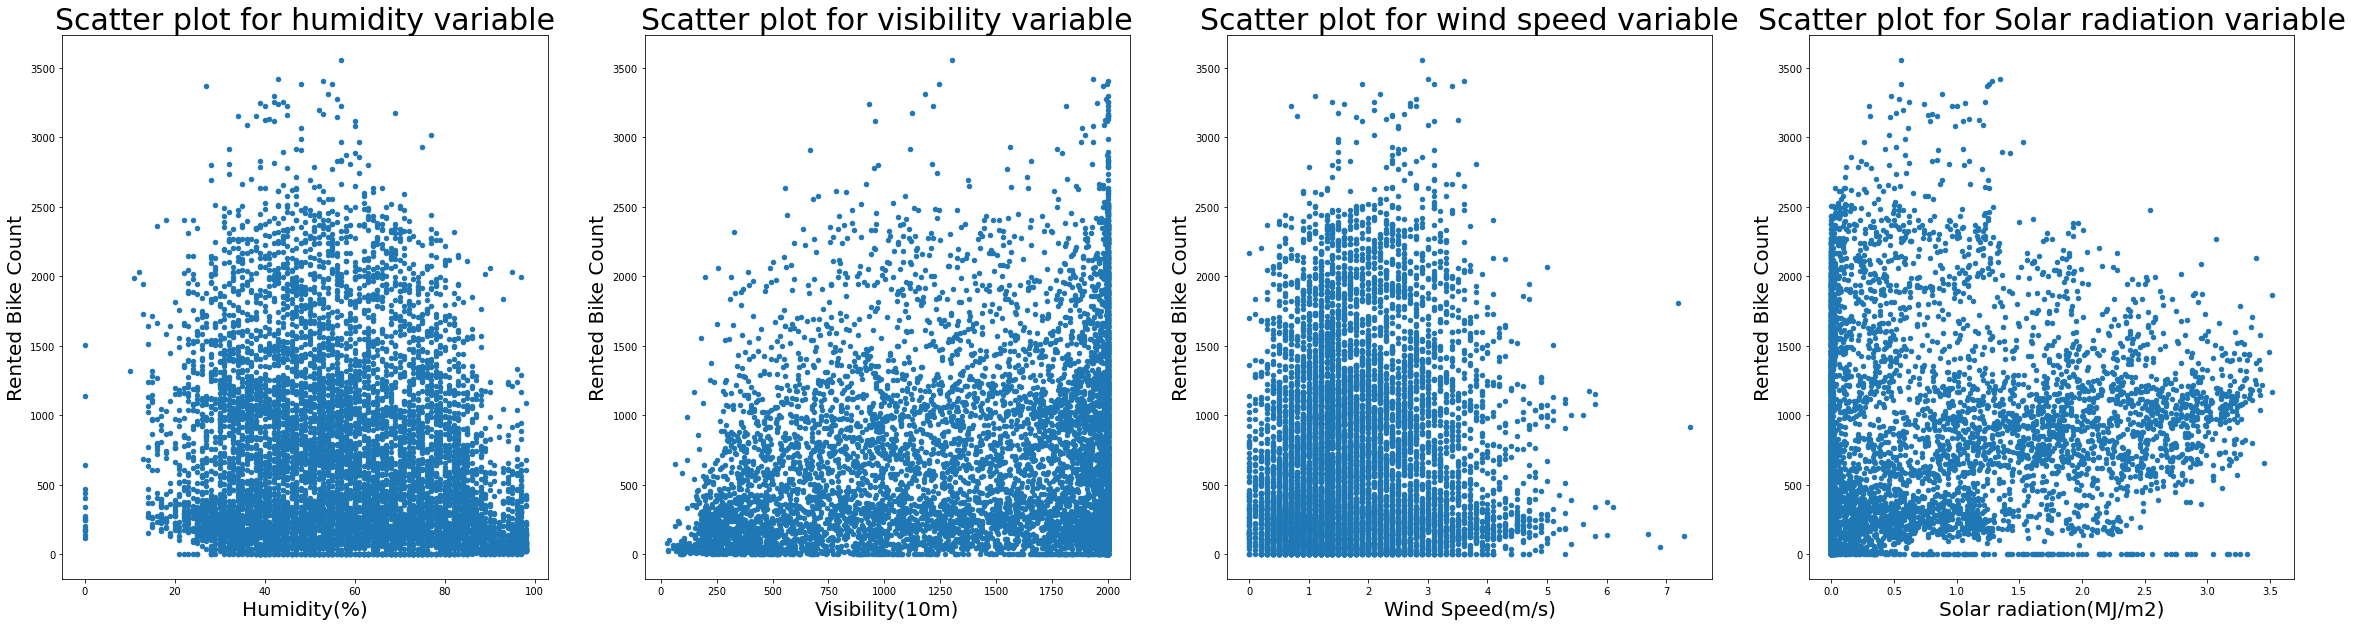

In [448]:
# Number of passengers by humidity, visibility, wind speed and solar radiation

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(40, 10))

bike_copy_df.plot.scatter(x= 'hum', y='cnt', marker = 'o', ax = ax1)
ax1.set_title('Scatter plot for humidity variable',fontsize = 30)
ax1.set_xlabel('Humidity(%)' , fontsize = 20)
ax1.set_ylabel('Rented Bike Count' , fontsize = 20)

bike_copy_df.plot.scatter(x= 'vis', y='cnt', marker = 'o', ax = ax2)
ax2.set_title('Scatter plot for visibility variable',fontsize = 30)
ax2.set_xlabel('Visibility(10m)' , fontsize = 20)
ax2.set_ylabel('Rented Bike Count' , fontsize = 20)

bike_copy_df.plot.scatter(x= 'windspeed', y='cnt', marker = 'o', ax = ax3)
ax3.set_title('Scatter plot for wind speed variable',fontsize = 30)
ax3.set_xlabel('Wind Speed(m/s)' , fontsize = 20)
ax3.set_ylabel('Rented Bike Count' , fontsize = 20)

bike_copy_df.plot.scatter(x= 'rad', y='cnt', marker = 'o', ax = ax4)
ax4.set_title('Scatter plot for Solar radiation variable',fontsize = 30)
ax4.set_xlabel('Solar radiation(MJ/m2)' , fontsize = 20)
ax4.set_ylabel('Rented Bike Count' , fontsize = 20)

The above plot describes how these variables affect the rented bike count variable. 

The humidity variable doesn't show any skewness with respect to rented bike count, which means the number of rented bikes is maximum when the humidity is around 40 to 60 percent.

The visibility variable is right skewed with respect to rented bike count. Thus, number os rented bikes increases as the visibility level increases.

The wind speed variable is left skewed with respect to rented bike count. This means that when  there is breeze the number of rented bikes is more.

The solar radiation variable is left skewed with respect to rented bike count. This means that when the intensity of sunlight is low, there is a high demand for rented bikes, which fairly decreases as the intensity of sunlight increases.

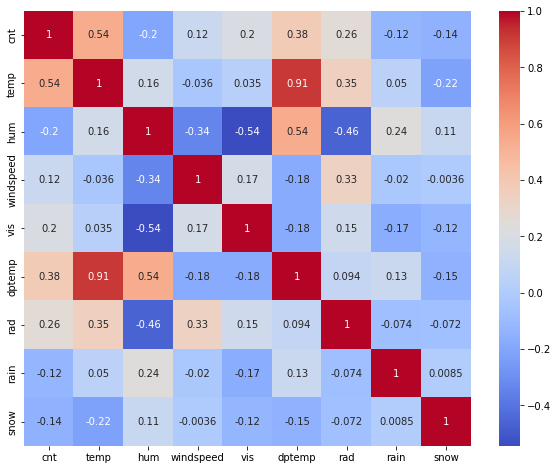

In [449]:
# Correlation

correlation_df = bike_copy_df.corr()
plt.figure(figsize=[10, 8])
sns.heatmap(correlation_df, cmap = 'coolwarm', annot = True)

According to the correlation heat-map above we find out that temp and dptemp are highly correlated, we also make the scatter plot to visulaize the relationship between them. We decide to drop dptemp to avoid multicollinearity.

Text(0, 0.5, 'Dew point temperature(°C)')

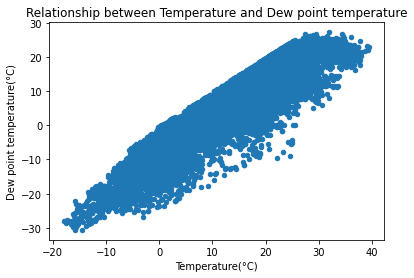

In [450]:
# Relationship between temp and dptemp

bike_copy_df.plot.scatter(x= 'temp', y='dptemp', marker = 'o')
plt.title('Relationship between Temperature and Dew point temperature')
plt.xlabel('Temperature(°C)')
plt.ylabel('Dew point temperature(°C)')

In [451]:
# Dropping dptemp

bike_copy_df.drop(['dptemp'], axis = 1, inplace = True)

Text(0, 0.5, 'Rented Bike Count')

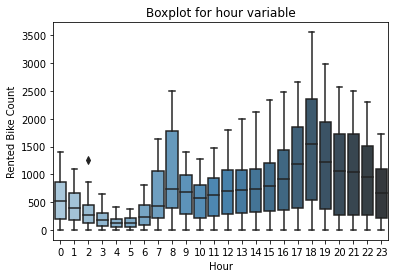

In [452]:
# Number of passangers by hour

sns.boxplot(x='hour', y='cnt', data=bike_copy_df, palette='Blues_d')
plt.title('Boxplot for hour variable')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

The number of rented bikes has a sharp increases during 8am when most people goes to school or offices, and again there is a sharp increase during 18pm, that is when most people return from their work. The demand is fairly high for the most part of afternoon and evening.

Text(0, 0.5, 'Rented Bike Count')

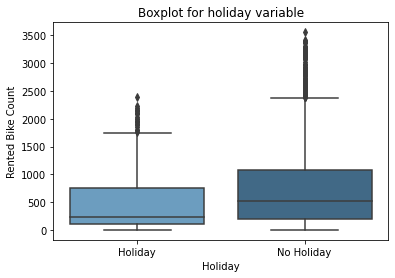

In [453]:
#  Number of passangers by holiday

sns.boxplot(x='holiday', y='cnt', data=bike_copy_df, palette='Blues_d')
plt.title('Boxplot for holiday variable')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')

The demand is fairly high for rented bikes during non holiday days with respect to holiday days.

Text(0, 0.5, 'Rented Bike Count')

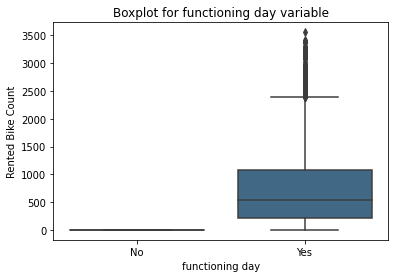

In [454]:
#  Number of passangers by functioning days

sns.boxplot(x='functioning day', y='cnt', data=bike_copy_df, palette='Blues_d')
plt.title('Boxplot for functioning day variable')
plt.xlabel('functioning day')
plt.ylabel('Rented Bike Count')

During non-functioning days, the demand for rented bikes is almost negligient whereas during functioning days, it is fairly high.

## Data pre-processing

In [455]:
# maping seasons

bike_copy_df.seasons = bike_copy_df.seasons.map({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})

In [456]:
#Rented during most busy season

bike_copy_df['IsHighSeason'] = np.where((bike_copy_df['seasons'] == 2), 1 ,0)
bike_copy_df['IsHighSeason'] = bike_copy_df['IsHighSeason'].astype('category')

In [457]:
# Rented during morning rush hour

bike_copy_df['IsRushHourMorning'] = np.where((bike_copy_df['hour'] == 7) & (bike_copy_df['hour'] == 8) &
                                             (bike_copy_df['hour'] == 9) & (bike_copy_df['hour'] == 10), 1 ,0)
bike_copy_df['IsRushHourMorning'] = bike_copy_df['IsRushHourMorning'].astype('category')

In [458]:
# Rented during evening rush hour

bike_copy_df['IsRushHourEvening'] = np.where((bike_copy_df['hour'] == 17) & (bike_copy_df['hour'] == 18) &
                                             (bike_copy_df['hour'] == 19) & (bike_copy_df['hour'] == 20), 1 ,0)
bike_copy_df['IsRushHourEvening'] = bike_copy_df['IsRushHourEvening'].astype('category')

In [459]:
# creating dummy variables

dummy = bike_copy_df[['hour', 'seasons', 'holiday', 'functioning day']]
dummy = pd.get_dummies(dummy, drop_first = True)

In [460]:
# adding dummy variable to the datafeame

bike_new_df = bike_copy_df.copy()
bike_new_df = pd.concat([bike_new_df, dummy], axis = 1)

In [461]:
# Dataframe

bike_new_df.head()

,date,cnt,hour,temp,hum,windspeed,vis,rad,rain,snow,seasons,holiday,functioning day,IsHighSeason,IsRushHourMorning,IsRushHourEvening,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_1,seasons_2,seasons_4,holiday_No Holiday,functioning day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,4,No Holiday,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,4,No Holiday,Yes,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,4,No Holiday,Yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,4,No Holiday,Yes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,4,No Holiday,Yes,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [462]:
# dropping columns for which dummy variables were created and not neccesary for training

bike_new_df.drop(['date', 'hour', 'seasons', 'holiday', 'functioning day'], axis = 1, inplace = True)

In [463]:
bike_new_df.head()

,cnt,temp,hum,windspeed,vis,rad,rain,snow,IsHighSeason,IsRushHourMorning,IsRushHourEvening,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_1,seasons_2,seasons_4,holiday_No Holiday,functioning day_Yes
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [464]:
bike_new_df.shape

(8760, 39)

# Modelling

**We will build three models** 

1. **Linear Regression**: Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (x) variables, hence called as linear regression.

2. **Knn(K nearest neighbour) Regression**: KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

3. **XGBoost**: XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

**Train and Test split**

In [465]:
# Distributing data into independent(X) and dependent(Y) variable

X = bike_new_df.drop(['cnt'], axis =1)
y = bike_new_df['cnt'] 

In [466]:
X.shape

(8760, 38)

In [467]:
y.shape

(8760,)

In [468]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [469]:
# splitting X and y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [470]:
# empty data frame for error storage

i=0
error_df=pd.DataFrame()

## Linear regresssion

In [471]:
# Fitting linear regression to training model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg = lr.fit(X_train, y_train)

In [472]:
# Prediction

y_pred = reg.predict(X_test)

**Evaluation**

In [473]:
#defining mape

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / (actual+1))) * 100

In [474]:
#evaluation metrics

from sklearn.metrics import *

MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE = mape(y_test, y_pred)
print("MAPE :" ,MAPE)

r2 = r2_score(y_test, y_pred)
print("R2 :", r2)

MAE : 285.4584486260877
MSE : 141391.15457345723
RMSE : 376.0201518182998
MAPE : 1374.8866592584004
R2 : 0.6606445905977423


**Linear regression gives r^2 score = 66%**

In [475]:
# Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)
error_df.loc[i,"r2_score"]=round(r2*100,2)

i+=1

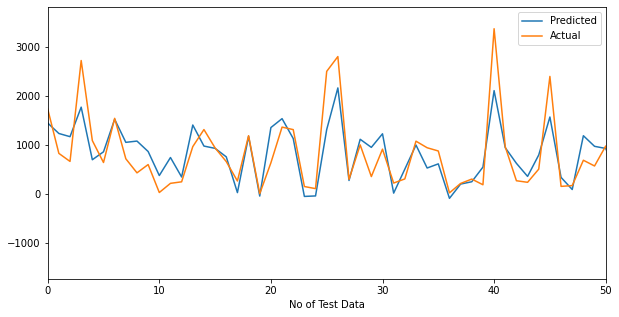

In [476]:
#actual-predicted values plot

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.xlim(0, 50)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [477]:
# Applying lasso regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, max_iter = 3000)
ls = lasso.fit(X_train, y_train)

In [478]:
y_pred = ls.predict(X_test)

In [479]:
r2_score(y_test, y_pred)

0.6606448369597463

In [480]:
# Cross Validation

from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [481]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -142798.85378162423


In [482]:
#prediction
y_pred = lasso_regressor.predict(X_test)

In [483]:
#evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

r2 = r2_score(y_test, y_pred)
print("R2 :", r2)

MAE : 285.40458870571035
MSE : 141387.94131978304
RMSE : 376.0158790793057
MAPE : 1363.6863251411025
R2 : 0.6606523027846851


**R^2 score for Lasso Regression = 66%**

In [484]:
# Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)
error_df.loc[i,"r2_score"]=round(r2*100,2)

i+=1

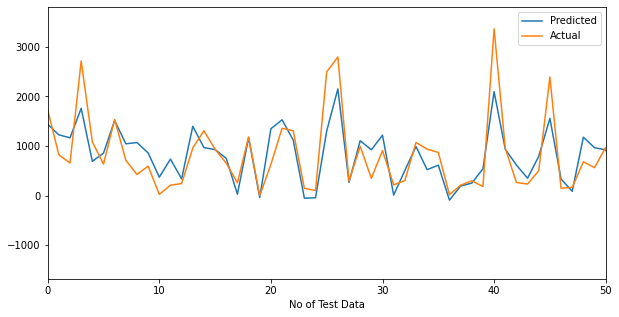

In [485]:
#actual-predicted values plot

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.xlim(0, 50)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [486]:
# Applying ridge regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001, max_iter = 3000)
rd = ridge.fit(X_train, y_train)

In [487]:
y_pred = rd.predict(X_test)

In [488]:
r2_score(y_test, y_pred)

0.6606443841924536

In [489]:
# Cross validation

ridge = Ridge()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [490]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -142793.37314449003


In [491]:
#prediction

y_pred = ridge_regressor.predict(X_test)

In [492]:
#evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

r2 = r2_score(y_pred, y_test)
print('r^2 score :', r2)

MAE : 285.44750969732405
MSE : 141368.15590889205
RMSE : 375.9895688830902
MAPE : 1373.346929361722
r^2 score : 0.4971362789701247


**R^2 score for ridge regression = 49%**

In [493]:
# Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)
error_df.loc[i,"r2_score"]=round(r2*100,2)

i+=1

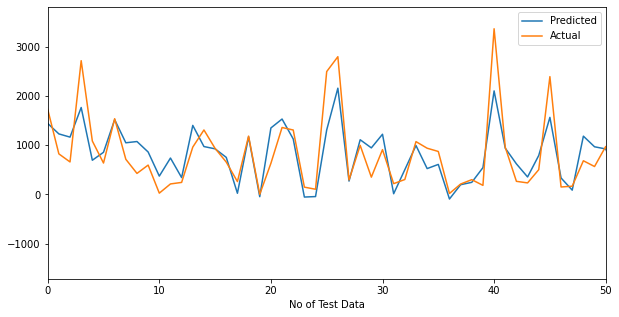

In [494]:
#actual-predicted values plot

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.xlim(0, 50)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## K Nearest Neighbour Regression

In [495]:
#hyperparameter tuning

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

model = GridSearchCV(knn, params, cv=5)

In [496]:
#fitting data

model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [497]:
#prediction

y_pred = model.predict(X_test)

In [498]:
#evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

r2 = r2_score(y_pred, y_test)
print('r^2 score :', r2)

MAE : 205.59574771689498
MSE : 108227.07088327626
RMSE : 328.9788304485203
MAPE : 450.72825292559156
r^2 score : 0.6923857866475096


**R^2 score for knn = 69%**

In [499]:
# Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='Knn regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)
error_df.loc[i,"r2_score"]=round(r2*100,2)

i+=1

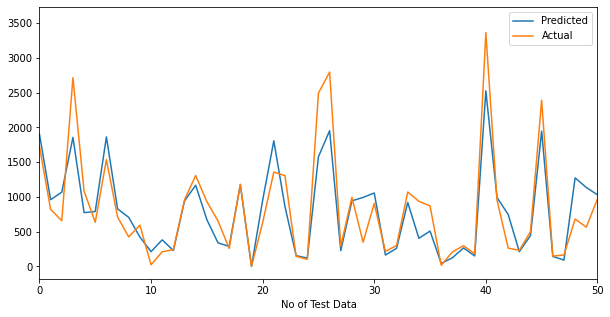

In [500]:
#actual-predicted values plot

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.xlim(0, 50)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## XGBoost Regressor

In [501]:
# Applying XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=15, objective="reg:squarederror")

xgb.fit(X_train, y_train)

XGBRegressor(learning_rate=0.01, n_estimators=15, objective='reg:squarederror')

In [502]:
# Prediction

y_pred = xgb.predict(X_test)

In [503]:
# evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

print('r^2 score :', r2_score(y_pred, y_test))

MAE : 608.512042354248
MSE : 732902.3525417091
RMSE : 856.0971630263174
MAPE : 161.131967937525
r^2 score : -199.02248072279173


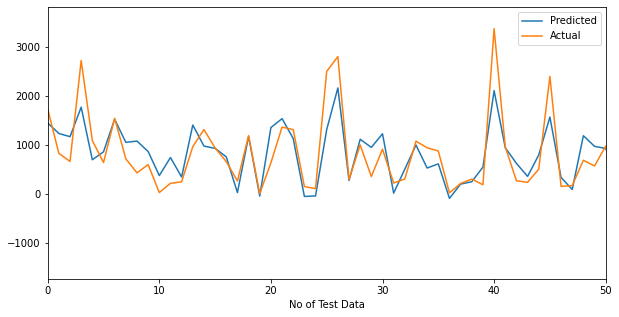

In [504]:
#actual-predicted values plot

plt.figure(figsize=(10,5))
plt.plot(y_predl)
plt.plot(np.array(y_test))
plt.xlim(0, 50)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [505]:
# Cross validation

gsc = GridSearchCV(estimator=XGBRegressor(),
                    param_grid={"max_depth": (6,7),
                                "learning_rate": (0.06, 0.08),
                                "n_estimators": (400, 600),
                                "subsample":(0.7,0.8),
                                "colsample_bytree":(0.4,0.5),
                                "gamma" : (1.4,1.5)
                               },
                    cv=5,
                    scoring="r2",
                    verbose=10,
                    n_jobs=4,
)

gsc.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[18:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=4,
             param_grid={'colsample_bytree': (0.4, 0.5), 'gamma': (1.4, 1.5),
                         'learning_rate': (0.06, 0.08), 'max_depth': (6, 7),
                         'n_estimators': (400, 600), 'subsample': (0.7, 0.8)},
             scoring='r2', verbose=10)

In [506]:
gsc.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1.4,
 'learning_rate': 0.06,
 'max_depth': 7,
 'n_estimators': 400,
 'subsample': 0.8}

In [507]:
# Training with best parameters

xgb = XGBRegressor(max_depth=7, learning_rate=0.06, n_estimators=400,
                 objective="reg:squarederror", subsample=0.8,
                 colsample_bytree=0.5, seed=1234, gamma = 1.4)

xgb.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.5, gamma=1.4, learning_rate=0.06, max_depth=7,
             n_estimators=400, objective='reg:squarederror', seed=1234,
             subsample=0.8)

In [508]:
# Prediction

y_pred = xgb.predict(X_test)

In [509]:
# evaluation metrics

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

r2 =  r2_score(y_pred, y_test)
print('r^2 score :', r2)

MAE : 153.69188623048672
MSE : 58127.081189772434
RMSE : 241.09558517271202
MAPE : 468.74455746685777
r^2 score : 0.8315591191704701


The result on R^2 score has improved significantly, which is around 83%

In [510]:
# Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='XGBoost regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"MAPE"]=round(MAPE,2)
error_df.loc[i,"r2_score"]=round(r2*100,2)

i+=1

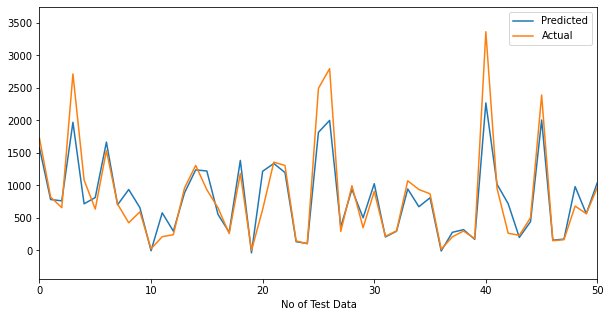

In [511]:
# actual-predicted values plot

plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.xlim(0, 50)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

As XGBoost gave the best results, lets see what features were important during modelling 

Feature: cnt, Score: 0.019896358251571655
Feature: temp, Score: 0.011492523364722729
Feature: hum, Score: 0.0033154620323330164
Feature: windspeed, Score: 0.0029529198072850704
Feature: vis, Score: 0.008982405066490173
Feature: rad, Score: 0.02381117269396782
Feature: rain, Score: 0.002240939764305949
Feature: snow, Score: 0.019783640280365944
Feature: IsHighSeason, Score: 0.0
Feature: IsRushHourMorning, Score: 0.0
Feature: IsRushHourEvening, Score: 0.007145608309656382
Feature: hour_1, Score: 0.024043772369623184
Feature: hour_2, Score: 0.035302720963954926
Feature: hour_3, Score: 0.052536532282829285
Feature: hour_4, Score: 0.045691270381212234
Feature: hour_5, Score: 0.025075914338231087
Feature: hour_6, Score: 0.004070009104907513
Feature: hour_7, Score: 0.01682618074119091
Feature: hour_8, Score: 0.0032092316541820765
Feature: hour_9, Score: 0.018008437007665634
Feature: hour_10, Score: 0.013036450371146202
Feature: hour_11, Score: 0.002034015255048871
Feature: hour_12, Score: 0.0

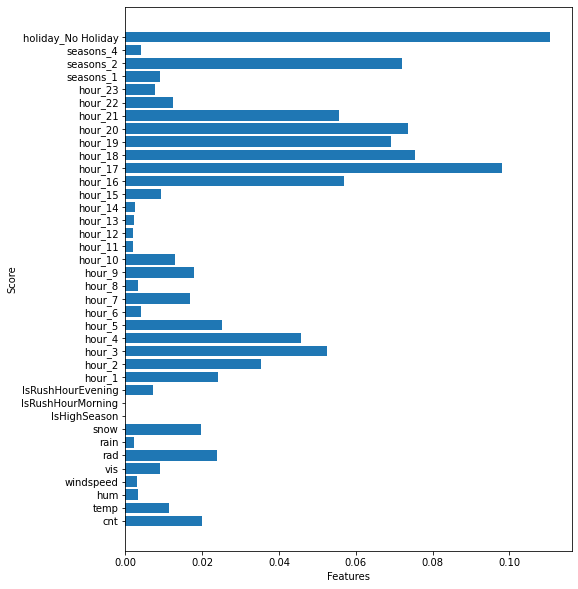

In [542]:
# Feature importance
importance = xgb.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {bike_new_df.columns[i]}, Score: {v}')
 
# plot feature importance
plt.figure(figsize=(8, 10))
plt.barh([bike_new_df.columns[x] for x in range(len(importance))], importance)
plt.ylabel('Features')
plt.xlabel('Score')
plt.show()

Days of No holiday has the most importance in the number of rented bikes count, followed by hour 17, which is the returning time from schools and offices. Season 2, i.e. Autumn also has good importance in predicting the number of rented bikes.

## Metrics Comparison

**Let's compare the performance of all regression models**

In [512]:
# creating error matrice

error_df.sort_values(by=['r2_score'],ascending=True,inplace=True)

In [513]:
error_df

,Model_Name,MAE,MSE,RMSE,MAPE,r2_score
2,Ridge regression,285.45,141368.16,375.99,1373.35,49.71
0,Linear regression,285.46,141391.15,376.02,1374.89,66.06
1,Lasso regression,285.40,141387.94,376.02,1363.69,66.07
3,Knn regression,205.60,108227.07,328.98,450.73,69.24
4,XGBoost regression,153.69,58127.08,241.10,468.74,83.16


# Conclusion

1. XGBoost Regression has given the best r2_score of 83.16% and with the least MAE, MSE, RMSE, MAPE scores.

2. Lasso regression did feature selection and ended up affecting the evaluating metrics.

3. Ridge regression shrunk the parameters to reduce complexity and multicollinearity, but ended up giving worse results than lasso which again reflects the fact that each feature is important (as previously discussed).

4. Knn has performed better than Linear and Lasso regression.

5. Features like days of no holidays, evening hours(17, 18, 19 and 20) and Autumn season plays important role in predicting the number of rented bikes.